In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import cv2
import time
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
sns.set_style('whitegrid')
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


np.random.seed(1234)

In [2]:
column_names = ["purchase_cost", "maintenance_cost", "no_of_doors", "no_of_seats", "boot_size", "safety", "classification"]

In [5]:
cars_df = pd.read_csv("car (1).data", header = None, names = column_names)
cars_df

purchase_cost maintenance_cost no_of_doors no_of_seats boot_size safety  \
0            vhigh            vhigh           2           2     small    low   
1            vhigh            vhigh           2           2     small    med   
2            vhigh            vhigh           2           2     small   high   
3            vhigh            vhigh           2           2       med    low   
4            vhigh            vhigh           2           2       med    med   
...            ...              ...         ...         ...       ...    ...   
1723           low              low       5more        more       med    med   
1724           low              low       5more        more       med   high   
1725           low              low       5more        more       big    low   
1726           low              low       5more        more       big    med   
1727           low              low       5more        more       big   high   

     classification  
0             unacc  
1             unacc  
2             unacc  
3             unacc  
4             unacc  
...             ...  
1723           good  
1724          vgood  
1725          unacc  
1726           good  
1727          vgood  

[1728 rows x 7 columns]

In [6]:
for col in column_names:    
    print(cars_df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: purchase_cost, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance_cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: no_of_doors, dtype: int64
2       576
4       576
more    576
Name: no_of_seats, dtype: int64
small    576
med      576
big      576
Name: boot_size, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: classification, dtype: int64


In [7]:
cars_df.rename(columns={'classification':'label'}, inplace = True)
cars_df.tail(50)

purchase_cost maintenance_cost no_of_doors no_of_seats boot_size safety  \
1678           low              low           4           2       med    med   
1679           low              low           4           2       med   high   
1680           low              low           4           2       big    low   
1681           low              low           4           2       big    med   
1682           low              low           4           2       big   high   
1683           low              low           4           4     small    low   
1684           low              low           4           4     small    med   
1685           low              low           4           4     small   high   
1686           low              low           4           4       med    low   
1687           low              low           4           4       med    med   
1688           low              low           4           4       med   high   
1689           low              low           4           4       big    low   
1690           low              low           4           4       big    med   
1691           low              low           4           4       big   high   
1692           low              low           4        more     small    low   
1693           low              low           4        more     small    med   
1694           low              low           4        more     small   high   
1695           low              low           4        more       med    low   
1696           low              low           4        more       med    med   
1697           low              low           4        more       med   high   
1698           low              low           4        more       big    low   
1699           low              low           4        more       big    med   
1700           low              low           4        more       big   high   
1701           low              low       5more           2     small    low   
1702           low              low       5more           2     small    med   
1703           low              low       5more           2     small   high   
1704           low              low       5more           2       med    low   
1705           low              low       5more           2       med    med   
1706           low              low       5more           2       med   high   
1707           low              low       5more           2       big    low   
1708           low              low       5more           2       big    med   
1709           low              low       5more           2       big   high   
1710           low              low       5more           4     small    low   
1711           low              low       5more           4     small    med   
1712           low              low       5more           4     small   high   
1713           low              low       5more           4       med    low   
1714           low              low       5more           4       med    med   
1715           low              low       5more           4       med   high   
1716           low              low       5more           4       big    low   
1717           low              low       5more           4       big    med   
1718           low              low       5more           4       big   high   
1719           low              low       5more        more     small    low   
1720           low              low       5more        more     small    med   
1721           low              low       5more        more     small   high   
1722           low              low       5more        more       med    low   
1723           low              low       5more        more       med    med   
1724           low              low       5more        more       med   high   
1725           low              low       5more        more       big    low   
1726           low              low       5more        more       big    med   
1727 

In [8]:
column_names = ["purchase_cost", "maintenance_cost", "no_of_doors", "no_of_seats", "boot_size", "safety", "label"]

In [9]:
cars_df['label'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: label, dtype: int64

In [10]:
cars_df.isna().sum()

purchase_cost       0
maintenance_cost    0
no_of_doors         0
no_of_seats         0
boot_size           0
safety              0
label               0
dtype: int64

In [11]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   purchase_cost     1728 non-null   object
 1   maintenance_cost  1728 non-null   object
 2   no_of_doors       1728 non-null   object
 3   no_of_seats       1728 non-null   object
 4   boot_size         1728 non-null   object
 5   safety            1728 non-null   object
 6   label             1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
cars_df.drop_duplicates()

purchase_cost maintenance_cost no_of_doors no_of_seats boot_size safety  \
0            vhigh            vhigh           2           2     small    low   
1            vhigh            vhigh           2           2     small    med   
2            vhigh            vhigh           2           2     small   high   
3            vhigh            vhigh           2           2       med    low   
4            vhigh            vhigh           2           2       med    med   
...            ...              ...         ...         ...       ...    ...   
1723           low              low       5more        more       med    med   
1724           low              low       5more        more       med   high   
1725           low              low       5more        more       big    low   
1726           low              low       5more        more       big    med   
1727           low              low       5more        more       big   high   

      label  
0     unacc  
1     unacc  
2     unacc  
3     unacc  
4     unacc  
...     ...  
1723   good  
1724  vgood  
1725  unacc  
1726   good  
1727  vgood  

[1728 rows x 7 columns]

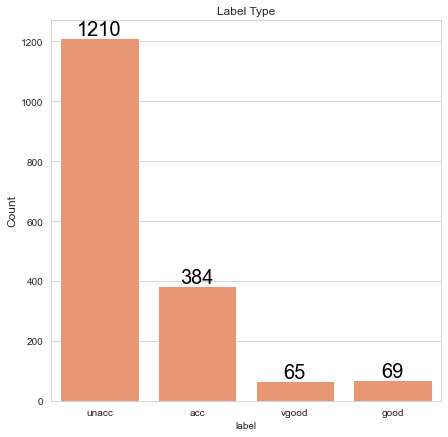

In [13]:
plt.figure(figsize=(7,7))
base_color= sns.color_palette("Set2", 9)[1]

sns.countplot(data=cars_df, x='label', color=base_color)
plt.title('Label Type',fontsize=12)
plt.ylabel('Count',fontsize=12)

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = cars_df['label'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=20)

In [14]:
le=LabelEncoder()

for col in cars_df.columns.values:
    if cars_df[col].dtypes=='object':
        cars_df[col]=le.fit_transform(cars_df[col])

In [15]:
cars_df

purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
0                 3                 3            0            0          2   
1                 3                 3            0            0          2   
2                 3                 3            0            0          2   
3                 3                 3            0            0          1   
4                 3                 3            0            0          1   
...             ...               ...          ...          ...        ...   
1723              1                 1            3            2          1   
1724              1                 1            3            2          1   
1725              1                 1            3            2          0   
1726              1                 1            3            2          0   
1727              1                 1            3            2          0   

      safety  label  
0          1      2  
1          2      2  
2          0      2  
3          1      2  
4          2      2  
...      ...    ...  
1723       2      1  
1724       0      3  
1725       1      2  
1726       2      1  
1727       0      3  

[1728 rows x 7 columns]

In [16]:
cars_df['label'].value_counts()

2    1210
0     384
1      69
3      65
Name: label, dtype: int64

In [17]:
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [18]:
X = cars_df[["purchase_cost", "maintenance_cost", "no_of_doors", "no_of_seats", "boot_size", "safety"]]
y = cars_df['label']

In [19]:
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
Counter(y)

Counter({2: 1210, 0: 1210, 3: 1210, 1: 1210})

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Data Distribution')

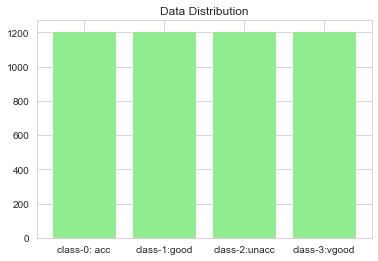

In [21]:
unique, counts = np.unique(y, return_counts=True)
y_count = dict(zip(unique, counts))
plt.bar(y_count.keys(),y_count.values(), color="lightgreen", tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood'])
plt.title('Data Distribution')

In [22]:
df_scaled = pd.DataFrame(X_scaled, columns=["purchase_cost", "maintenance_cost", "no_of_doors", "no_of_seats", "boot_size", "safety"])
df_scaled['label'] = y
df_scaled.head()


purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
0       1.918646           1.83462    -1.378433    -1.917971   1.573781   
1       1.918646           1.83462    -1.378433    -1.917971   1.573781   
2       1.918646           1.83462    -1.378433    -1.917971   1.573781   
3       1.918646           1.83462    -1.378433    -1.917971   0.305533   
4       1.918646           1.83462    -1.378433    -1.917971   0.305533   

     safety  label  
0  0.231838      2  
1  1.325499      2  
2 -0.861823      2  
3  0.231838      2  
4  1.325499      2

In [23]:
df_new = df_scaled
df_new['label'] = y
df_new.head()

purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
0       1.918646           1.83462    -1.378433    -1.917971   1.573781   
1       1.918646           1.83462    -1.378433    -1.917971   1.573781   
2       1.918646           1.83462    -1.378433    -1.917971   1.573781   
3       1.918646           1.83462    -1.378433    -1.917971   0.305533   
4       1.918646           1.83462    -1.378433    -1.917971   0.305533   

     safety  label  
0  0.231838      2  
1  1.325499      2  
2 -0.861823      2  
3  0.231838      2  
4  1.325499      2

In [24]:
from sklearn.model_selection import train_test_split

xtrain, df_test = train_test_split(df_new, test_size=0.1, stratify=df_new['label'],shuffle=True)
df_train, df_val = train_test_split(xtrain, test_size=0.2, stratify=xtrain['label'],shuffle=True)

In [25]:
xtrain

purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
714       -1.568492          0.750027     0.457455    -0.388650   0.305533   
2209      -0.406112          1.834620    -1.378433    -0.388650   0.305533   
2642      -0.406112         -0.334565     0.457455     1.140671   0.305533   
2447       1.918646         -0.334565     1.375398    -0.388650   0.305533   
462       -1.568492          1.834620    -0.460489    -1.917971   0.305533   
...             ...               ...          ...          ...        ...   
4628      -0.406112         -1.419158     1.375398     1.140671   0.305533   
321        1.918646          0.750027     1.375398     1.140671  -0.962716   
2798      -0.406112         -0.334565    -1.378433    -0.388650   1.573781   
2475      -0.406112         -0.334565    -0.460489    -0.388650   1.573781   
4224       0.756267         -0.334565    -0.460489    -0.388650  -0.962716   

        safety  label  
714   0.231838      2  
2209 -0.861823      0  
2642  1.325499      1  
2447 -0.861823      0  
462   0.231838      2  
...        ...    ...  
4628 -0.861823      3  
321   0.231838      2  
2798 -0.861823      1  
2475  1.325499      0  
4224 -0.861823      3  

[4356 rows x 7 columns]

In [26]:
df_train.head()

purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
1439      -0.406112         -1.419158    -0.460489    -1.917971  -0.962716   
4250       0.756267         -0.334565     0.457455     1.140671  -0.962716   
2454       1.918646         -0.334565    -0.460489     1.140671  -0.962716   
2981      -0.406112         -0.334565    -0.460489     1.140671   0.305533   
1560      -0.406112          0.750027    -0.460489     1.140671   0.305533   

        safety  label  
1439 -0.861823      2  
4250 -0.861823      3  
2454 -0.861823      0  
2981  1.325499      1  
1560  0.231838      2

In [27]:
df_val.head()

purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
27         1.918646          1.834620    -0.460489    -1.917971   1.573781   
4044      -0.406112          0.750027    -0.460489     1.140671  -0.962716   
1024       0.756267         -1.419158    -0.460489     1.140671  -0.962716   
2652       0.756267         -0.334565    -0.460489     1.140671  -0.962716   
3649      -0.406112         -0.334565     0.457455    -0.388650  -0.962716   

        safety  label  
27    0.231838      2  
4044 -0.861823      3  
1024  1.325499      0  
2652  1.325499      1  
3649  1.325499      1

In [28]:
df_test.head()

purchase_cost  maintenance_cost  no_of_doors  no_of_seats  boot_size  \
3225      -0.406112          0.750027     0.457455    -0.388650  -0.962716   
1376      -0.406112          1.834620     0.457455     1.140671  -0.962716   
1203       0.756267         -0.334565    -1.378433    -0.388650  -0.962716   
2126       1.918646          0.750027     0.457455    -0.388650   1.573781   
214        1.918646         -1.419158     1.375398     1.140671  -0.962716   

        safety  label  
3225  1.325499      1  
1376 -0.861823      0  
1203  0.231838      2  
2126 -0.861823      0  
214   1.325499      2

In [29]:
!pip install imblearn

In [30]:
class decisionTree:

    def __init__(self, size=2, depth = 450) :
        self.size = size
        self.depth = depth
        

    def decisionTreeBuilder(self, dataframe,curr_depth = 0):
        if curr_depth == 0:
            global cols
            cols = dataframe.columns
            data = dataframe.values
        else:
            data = dataframe
        if curr_depth == self.depth or (len(list(set(data[:, -1]))) == 1) or len(data) < self.size:   
            classes, count_class = np.unique(data[:, -1], return_counts = True)
            return classes[np.argmax(count_class)]
        else:
            curr_depth += 1
            split = {}
            _, columns = data.shape
            for column in list(range(columns -1)):
                values = data[:, column]
                nominal_values = np.unique(values)
                if len(nominal_values) == 1:
                    split[column] = nominal_values
                else:
                    split[column] = []
                    for i in range(len(nominal_values)):
                        if i != 0:
                            curr_value = nominal_values[i]
                            prev_value = nominal_values[i - 1]
                            split[column].append((curr_value + prev_value) / 2)
            Infogain = -float("inf")
            split_col_best = 0
            split_val_best = 0
            for split_col in split:
                for split_val in split[split_col]:
                    value_down, value_up = data[data[:, split_col] <= split_val], data[data[:, split_col] >split_val]
                    _,classes = np.unique(data[:, -1], return_counts=True)
                    prob = classes/classes.sum()
                    k = 1- np.sum(np.square(prob)) if "gini" != "entropy" else np.sum(prob * -np.log2(prob))

                    value_up_probability = len(value_up) / (len(value_down) + len(value_up))
                    value_down_probability = len(value_down) / (len(value_down) + len(value_up))

                    _,classes = np.unique(value_down[:, -1], return_counts=True)
                    prob = classes/classes.sum()
                    i = 1- np.sum(np.square(prob)) if "gini" != "entropy" else np.sum(prob * -np.log2(prob))
                    _,classes = np.unique(value_up[:, -1], return_counts=True)
                    prob = classes/classes.sum()
                    j = 1- np.sum(np.square(prob)) if "gini" != "entropy" else np.sum(prob * -np.log2(prob))
                    l = k - (value_down_probability * i + value_up_probability * j)
                    CurrInfogain = l
                    if CurrInfogain >= Infogain:
                        Infogain = CurrInfogain
                        split_col_best = split_col
                        split_val_best = split_val
            split_col, split_val = split_col_best, split_val_best
            data_down, data_up = data[data[:, split_col] <= split_val], data[data[:, split_col] >split_val]   
            if len(data_down) == 0 or len(data_up) == 0:
                classes, count_class = np.unique(data[:, -1], return_counts = True)
                return classes[count_class.argmax()]
            else:
                ques = str(cols[split_col]) + " <= " + str(split_val)
                decisionTree = {ques: []}
                pos = self.decisionTreeBuilder(data_down, curr_depth)
                neg = self.decisionTreeBuilder(data_up, curr_depth)
                if pos == neg:
                    decisionTree = pos
                else:
                    decisionTree[ques].append(pos)
                    decisionTree[ques].append(neg)
                return decisionTree
        
    def cat_iterative(self, sample, tree):
        
        if not isinstance(tree, dict):
            predictedOutput = tree
            return predictedOutput
        else:
            stack = []
            ques = list(tree.keys())[0]
            attr, val = ques.split(" <= ")
            stack.append(tree[ques][0] if sample[attr] <= float(val) else tree[ques][1])
            while stack:
                output = stack.pop()
                if isinstance(output, dict):
                    ques = list(output.keys())[0]
                    attr, val = ques.split(" <= ")
                
                    stack.append(output[ques][0] if sample[attr] <= float(val) else output[ques][1])
                else:
                    predictedOutput =output
                    #print("abc",predictedOutput)
                    return predictedOutput
       
    def predict(self, df,  tree):
        return df.apply(self.cat_iterative, axis = 1, args = (tree,))

In [31]:
train, test, val, ivalues = [], [],[],[]
acc_train, acc_val = 0,0
i =1

for i in range(31):
    diff = acc_train - acc_val
    if diff > 1:
        break
    tree = decisionTree(depth = i)
    
    decision_tree = tree.decisionTreeBuilder(df_train)
    decision_tree_val_results = tree.predict(df_val, decision_tree)
    decision_tree_test_results = tree.predict(df_test, decision_tree)
    decision_tree_train_results = tree.predict(df_train, decision_tree)
    acc_val = np.mean(decision_tree_val_results == df_val.iloc[:, -1])*100
   # print("accuracy_val",accuracy_val)
    val.append(acc_val)
    acc_test = np.mean(decision_tree_test_results == df_test.iloc[:, -1])*100
   # print("accuracy_test",accuracy_test)
    test.append(acc_test)
    acc_train = np.mean(decision_tree_train_results== df_train.iloc[:, -1]) * 100
  #  print("accuracy_train",accuracy_train)
    train.append(acc_train)
    ivalues.append(i)
   
    print('Depth: {}\tAccuracy Train: {:.3f} \tAccuracy Test: {:.3f} \tAccuracy Validation: {:.3f} \tDifference: {:.2f}'.format(
        i, acc_train, acc_test,acc_val,diff))
    i += 1


Depth: 0	Accuracy Train: 25.000 	Accuracy Test: 25.000 	Accuracy Validation: 25.000 	Difference: 0.00
Depth: 1	Accuracy Train: 36.768 	Accuracy Test: 36.570 	Accuracy Validation: 37.615 	Difference: 0.00
Depth: 2	Accuracy Train: 50.918 	Accuracy Test: 51.653 	Accuracy Validation: 52.064 	Difference: -0.85
Depth: 3	Accuracy Train: 65.959 	Accuracy Test: 65.702 	Accuracy Validation: 66.055 	Difference: -1.15
Depth: 4	Accuracy Train: 74.282 	Accuracy Test: 73.967 	Accuracy Validation: 74.427 	Difference: -0.10
Depth: 5	Accuracy Train: 79.650 	Accuracy Test: 80.785 	Accuracy Validation: 79.128 	Difference: -0.14
Depth: 6	Accuracy Train: 85.620 	Accuracy Test: 85.744 	Accuracy Validation: 84.748 	Difference: 0.52
Depth: 7	Accuracy Train: 89.122 	Accuracy Test: 89.256 	Accuracy Validation: 88.647 	Difference: 0.87
Depth: 8	Accuracy Train: 95.207 	Accuracy Test: 94.628 	Accuracy Validation: 94.495 	Difference: 0.47
Depth: 9	Accuracy Train: 96.355 	Accuracy Test: 95.661 	Accuracy Validation: 9

In [32]:
error_train = 1 - (np.array(train)/100)
error_val = 1 - (np.array(val)/100)
error_test = 1 - (np.array(test)/100)

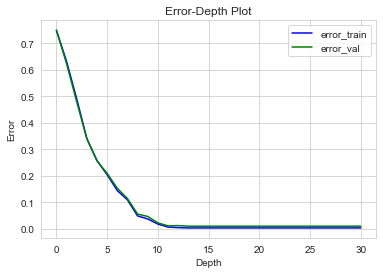

In [33]:
# Plotting the Graph
plt.plot(ivalues, error_train, "-b", label="error_train")
plt.plot(ivalues, error_val, "-g", label="error_val")
plt.title("Error-Depth Plot")
plt.xlabel("Depth")
plt.ylabel("Error")
plt.legend()
plt.show()

In [34]:
acc_train = np.array(train)/100
acc_val = np.array(val)/100
acc_test = np.array(test)/100

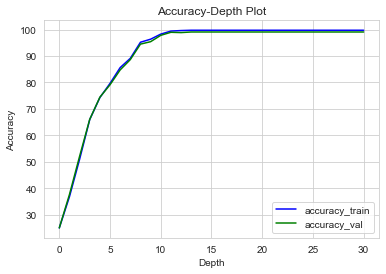

In [35]:
# Plotting the Graph
plt.plot(ivalues, train, "-b", label="accuracy_train")
plt.plot(ivalues, val, "-g", label="accuracy_val")
plt.title("Accuracy-Depth Plot")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#7 8 9 10 ---

In [36]:
X_train_new = df_train.values
y_train = df_train['label'].values

In [37]:
X_train_new

array([[-0.40611228, -1.41915807, -0.46048903, ..., -0.96271594,
        -0.86182278,  2.        ],
       [ 0.75626705, -0.33456545,  0.4574545 , ..., -0.96271594,
        -0.86182278,  3.        ],
       [ 1.91864638, -0.33456545, -0.46048903, ..., -0.96271594,
        -0.86182278,  0.        ],
       ...,
       [-0.40611228,  0.75002717,  1.37539803, ..., -0.96271594,
        -0.86182278,  3.        ],
       [-0.40611228,  0.75002717,  0.4574545 , ...,  0.3055326 ,
         1.3254988 ,  1.        ],
       [-0.40611228,  0.75002717, -1.37843256, ..., -0.96271594,
         1.3254988 ,  1.        ]])

In [38]:
len(y_train)

3484

In [39]:
from itertools import product

X = X_train_new[:,:2]
y= y_train

In [40]:
# Plot decision trees

dT10 = decisionTree(depth=10)
d10 = dT10.decisionTreeBuilder(df_train)


dT11 = decisionTree(depth=11)
d11 = dT11.decisionTreeBuilder(df_train)


dT12 = decisionTree(depth=12)
d12 = dT12.decisionTreeBuilder(df_train)


dT13 = decisionTree(depth=13)
d13 = dT13.decisionTreeBuilder(df_train)

In [41]:
d10

{'no_of_seats <= -1.1533102189398758': [2.0,
  {'safety <= -0.3149923847913434': [{'boot_size <= 0.939656871623689': [{'purchase_cost <= -0.9873019480036092': [{'maintenance_cost <= 1.292323477935346': [0.0,
          2.0]},
        {'maintenance_cost <= 1.292323477935346': [{'purchase_cost <= 1.3374567133135729': [{'no_of_doors <= -0.9194607919842919': [{'boot_size <= -0.32859166676411206': [{'maintenance_cost <= -0.8768617598683908': [{'purchase_cost <= 0.17507738265498185': [3.0,
                    0.0]},
                  3.0]},
                {'maintenance_cost <= -0.8768617598683908': [0.0, 1.0]}]},
              {'maintenance_cost <= -0.8768617598683908': [{'purchase_cost <= 0.17507738265498185': [3.0,
                  0.0]},
                3.0]}]},
            {'maintenance_cost <= -0.8768617598683908': [2.0, 0.0]}]},
          {'purchase_cost <= 1.3374567133135729': [0.0, 2.0]}]}]},
      {'maintenance_cost <= -0.8768617598683908': [{'purchase_cost <= 1.3374567133135729': 

In [42]:
d13

{'no_of_seats <= -1.1533102189398758': [2.0,
  {'safety <= -0.3149923847913434': [{'boot_size <= 0.939656871623689': [{'purchase_cost <= -0.9873019480036092': [{'maintenance_cost <= 1.292323477935346': [0.0,
          2.0]},
        {'maintenance_cost <= 1.292323477935346': [{'purchase_cost <= 1.3374567133135729': [{'no_of_doors <= -0.9194607919842919': [{'boot_size <= -0.32859166676411206': [{'maintenance_cost <= -0.8768617598683908': [{'purchase_cost <= 0.17507738265498185': [3.0,
                    0.0]},
                  3.0]},
                {'maintenance_cost <= -0.8768617598683908': [0.0,
                  {'maintenance_cost <= 0.20773085903347766': [1.0,
                    {'purchase_cost <= 0.17507738265498185': [1.0, 0.0]}]}]}]},
              {'maintenance_cost <= -0.8768617598683908': [{'purchase_cost <= 0.17507738265498185': [3.0,
                  0.0]},
                {'no_of_doors <= -0.0015172620329773345': [{'boot_size <= -0.32859166676411206': [3.0,
            

In [43]:
#X_train = df_train.values
X_train_new = df_train.loc[ : , df_train.columns != 'label']
y_train = df_train['label'].values

In [44]:
df_test

X_test_new = df_test.loc[ : , df_test.columns != 'label']
y_test = df_test['label'].values

# Using Pre-Pruning to determine the correct depth to stop the building of decision tree

In [45]:
model = DecisionTreeClassifier(random_state = 42)
params = {'max_depth': [7, 9,11,13]}
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#prepruning
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=params)
model = gcv.best_estimator_
model.fit(X_train_new,y_train)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.9942594718714122
Test score 0.9855371900826446


In [46]:
model = DecisionTreeClassifier(random_state = 42)
params = {'max_depth': [1,3,5,7,9]}
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#prepruning
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=params)
model = gcv.best_estimator_
model.fit(X_train_new,y_train)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.9635476463834672
Test score 0.9566115702479339


In [47]:
model = DecisionTreeClassifier(random_state = 42)
params = {'max_depth': [8]}
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#prepruning
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=params)
model = gcv.best_estimator_
model.fit(X_train_new,y_train)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9520665901262916
Test score 0.9462809917355371


In [48]:
model = DecisionTreeClassifier(random_state = 42)
params = {'max_depth': [13]}
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#prepruning
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(X_train_new,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=params)
model = gcv.best_estimator_
model.fit(X_train_new,y_train)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9974167623421355
Test score 0.9917355371900827


# Depth:10

In [49]:
from sklearn.metrics import classification_report
pred_d10 = dT10.predict(df_train, d10)
cm = confusion_matrix(df_train['label'].values, pred_d10.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_train['label'].values, pred_d10.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_train['label'].values, pred_d10.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_train['label'].values, pred_d10.values, target_names=tick_label))

Confusion matrix

 [[838  27   0   6]
 [  0 848   0  23]
 [  4   0 867   0]
 [  0   0   0 871]]


Accuracy: 0.98278
Error rate:0.01722

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       1.00      0.96      0.98       871
 class-1:good       0.97      0.97      0.97       871
class-2:unacc       1.00      1.00      1.00       871
class-3:vgood       0.97      1.00      0.98       871

     accuracy                           0.98      3484
    macro avg       0.98      0.98      0.98      3484
 weighted avg       0.98      0.98      0.98      3484



In [50]:
model = DecisionTreeClassifier(max_depth =10, random_state = 42)
mymodel_10 = model.fit(X_train_new,y_train)
score = cross_validate(mymodel_10,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]

test_score  train_score
0    0.972740     0.987083
1    0.979914     0.983136
2    0.972740     0.983495
3    0.985653     0.981342
4    0.972701     0.985653

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel_10,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Error rate", 1 - np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))

25-fold accuracy scores:
 [0.97142857 0.97857143 0.99285714 0.95714286 0.99285714 0.97857143
 0.98571429 0.97857143 0.98571429 0.98561151 0.95683453 0.99280576
 0.97122302 0.97841727 0.97841727 0.99280576 1.         0.97841727
 1.         0.96402878 0.97122302 0.97841727 0.95683453 0.97841727
 0.98561151]
Mean cv-accuracy:
 0.9796197327852003
Error rate 0.020380267214799686
Standard Deviation of cv-accuracy:
 0.012133013857050495


In [52]:
leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)

max_depth  10
no. of nodes 159
159
159
no of leaves 80


# Depth:11

In [53]:
pred_d11 = dT11.predict(df_train, d11)
cm = confusion_matrix(df_train['label'].values, pred_d11.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_train['label'].values, pred_d11.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_train['label'].values, pred_d11.values):.5f}")
print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_train['label'].values, pred_d11.values, target_names=tick_label))

Confusion matrix

 [[857  12   0   2]
 [  1 870   0   0]
 [  1   0 870   0]
 [  0   4   0 867]]


Accuracy: 0.99426
Error rate:0.00574

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       1.00      0.98      0.99       871
 class-1:good       0.98      1.00      0.99       871
class-2:unacc       1.00      1.00      1.00       871
class-3:vgood       1.00      1.00      1.00       871

     accuracy                           0.99      3484
    macro avg       0.99      0.99      0.99      3484
 weighted avg       0.99      0.99      0.99      3484



In [54]:
model = DecisionTreeClassifier(max_depth =11, random_state = 42)
mymodel_11 = model.fit(X_train_new,y_train)
score = cross_validate(mymodel_11,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]

test_score  train_score
0    0.992826     0.994259
1    0.991392     0.993900
2    0.992826     0.992824
3    0.994261     0.991747
4    0.978448     0.993902

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel_11,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Error rate", 1 - np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))

25-fold accuracy scores:
 [0.99285714 0.99285714 1.         0.98571429 0.99285714 0.99285714
 1.         0.97857143 1.         0.99280576 1.         1.
 1.         0.99280576 0.99280576 1.         1.         0.98561151
 1.         0.98561151 0.98561151 0.97841727 0.97122302 0.97841727
 0.99280576]
Mean cv-accuracy:
 0.9916731757451182
Error rate 0.008326824254881848
Standard Deviation of cv-accuracy:
 0.008298926812112998


In [56]:
leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)

max_depth  11
no. of nodes 179
179
179
no of leaves 90


# Depth:12

In [57]:
pred_d12 = dT12.predict(df_train, d12)
cm = confusion_matrix(df_train['label'].values, pred_d12.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_train['label'].values, pred_d12.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_train['label'].values, pred_d12.values):.5f}")
print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_train['label'].values, pred_d12.values, target_names=tick_label))

Confusion matrix

 [[864   5   0   2]
 [  2 869   0   0]
 [  0   0 871   0]
 [  4   0   0 867]]


Accuracy: 0.99627
Error rate:0.00373

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.99      0.99      0.99       871
 class-1:good       0.99      1.00      1.00       871
class-2:unacc       1.00      1.00      1.00       871
class-3:vgood       1.00      1.00      1.00       871

     accuracy                           1.00      3484
    macro avg       1.00      1.00      1.00      3484
 weighted avg       1.00      1.00      1.00      3484



In [58]:
model = DecisionTreeClassifier(max_depth =12, random_state = 42)
mymodel_12 = model.fit(X_train_new,y_train)
score = cross_validate(mymodel_12,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]

test_score  train_score
0    0.988522     0.996412
1    0.991392     0.996771
2    0.995696     0.995694
3    0.994261     0.995694
4    0.978448     0.997848

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel_12,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Error rate", 1 - np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))

25-fold accuracy scores:
 [0.99285714 0.99285714 1.         0.98571429 0.99285714 0.99285714
 0.98571429 0.98571429 0.99285714 0.99280576 1.         1.
 1.         0.99280576 0.99280576 1.         1.         0.98561151
 1.         0.99280576 0.98561151 0.97841727 0.97841727 0.97841727
 0.99280576]
Mean cv-accuracy:
 0.991677286742035
Error rate 0.008322713257964964
Standard Deviation of cv-accuracy:
 0.006945341622950838


In [60]:
leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)

max_depth  12
no. of nodes 193
193
193
no of leaves 97


# Depth:13

In [61]:
pred_d13 = dT13.predict(df_train, d13)
cm = confusion_matrix(df_train['label'].values, pred_d13.values)
print('Confusion matrix\n\n',cm)

print('\n')
print(f"Accuracy: { accuracy_score(df_train['label'].values, pred_d13.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_train['label'].values, pred_d13.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_train['label'].values, pred_d13.values, target_names=tick_label))

Confusion matrix

 [[864   2   0   5]
 [  2 869   0   0]
 [  0   0 871   0]
 [  0   0   0 871]]


Accuracy: 0.99742
Error rate:0.00258

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       1.00      0.99      0.99       871
 class-1:good       1.00      1.00      1.00       871
class-2:unacc       1.00      1.00      1.00       871
class-3:vgood       0.99      1.00      1.00       871

     accuracy                           1.00      3484
    macro avg       1.00      1.00      1.00      3484
 weighted avg       1.00      1.00      1.00      3484



In [62]:
model = DecisionTreeClassifier(max_depth =13, random_state = 42)
mymodel_13 = model.fit(X_train_new,y_train)
score = cross_validate(mymodel_13,X_train_new,y_train, return_train_score = True)
print(pd.DataFrame(score)[["test_score", "train_score"]])

   test_score  train_score
0    0.989957     0.997130
1    0.988522     0.997488
2    0.994261     0.997130
3    0.994261     0.996412
4    0.981322     0.997848


In [63]:
feature_names =["purchase_cost", "maintenance_cost", "no_of_doors", "no_of_seats", "boot_size", "safety"]
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
text_representation = tree.export_text(model, feature_names=feature_names)
print(text_representation)

|--- no_of_seats <= -1.15
|   |--- class: 2
|--- no_of_seats >  -1.15
|   |--- safety <= -0.31
|   |   |--- boot_size <= 0.94
|   |   |   |--- purchase_cost <= -0.99
|   |   |   |   |--- maintenance_cost <= 1.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maintenance_cost >  1.29
|   |   |   |   |   |--- class: 2
|   |   |   |--- purchase_cost >  -0.99
|   |   |   |   |--- maintenance_cost <= 1.29
|   |   |   |   |   |--- purchase_cost <= 1.34
|   |   |   |   |   |   |--- no_of_doors <= -0.92
|   |   |   |   |   |   |   |--- boot_size <= -0.33
|   |   |   |   |   |   |   |   |--- maintenance_cost <= -0.88
|   |   |   |   |   |   |   |   |   |--- purchase_cost <= 0.18
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- purchase_cost >  0.18
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- maintenance_cost >  -0.88
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |

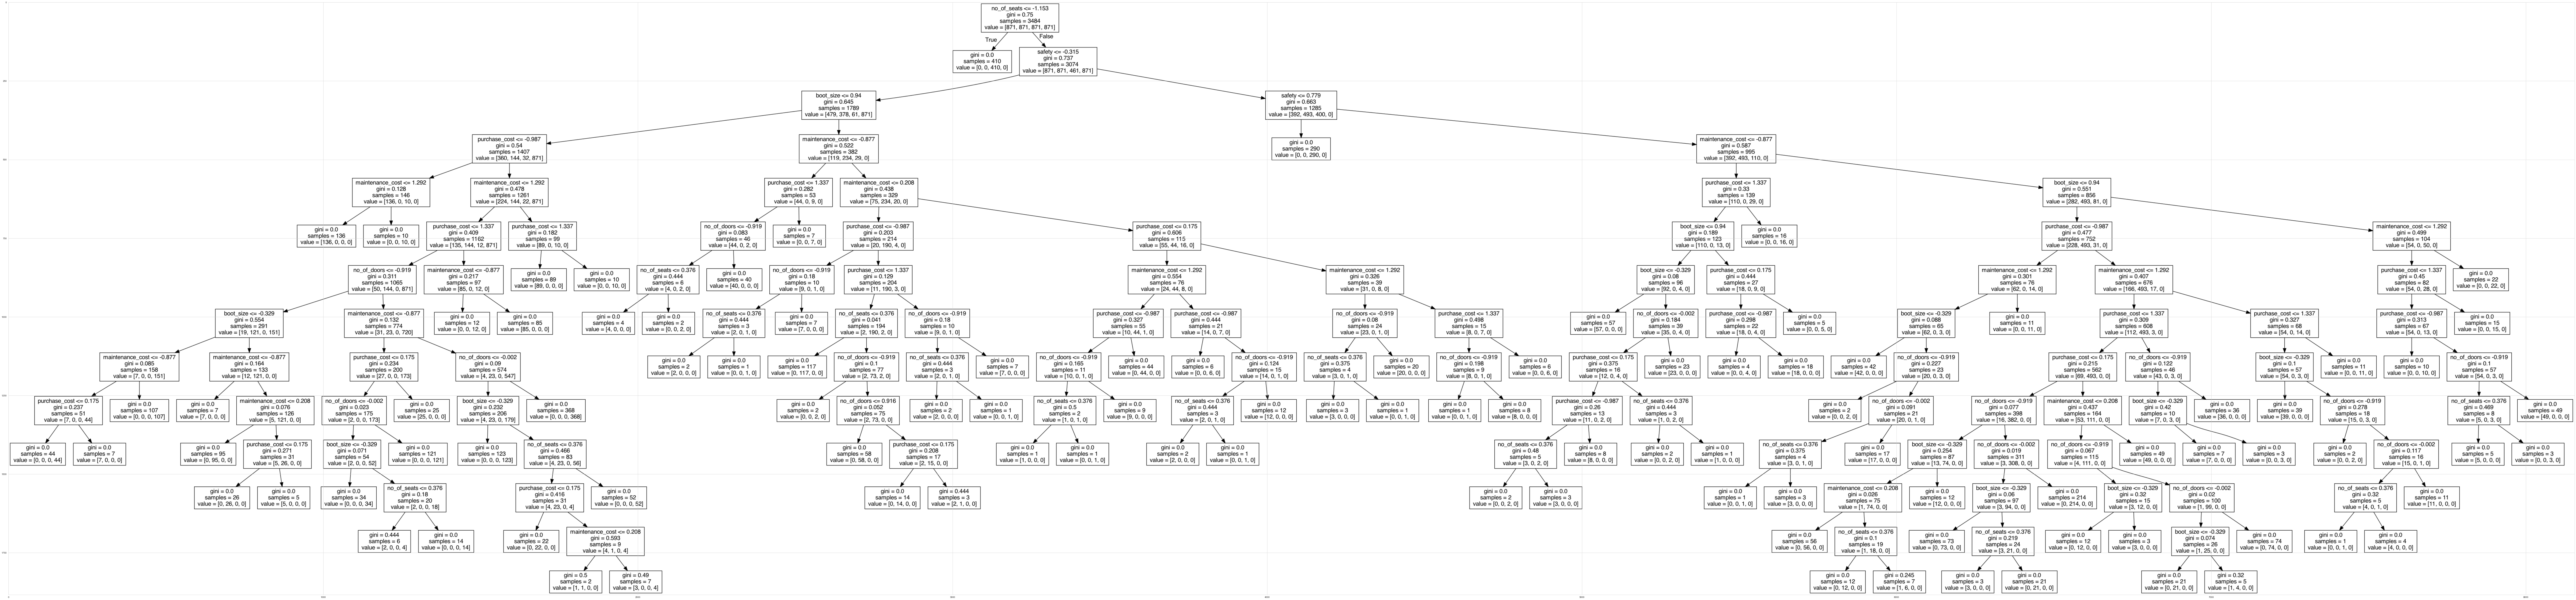

In [64]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = feature_names)
! dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.figure(figsize = (200, 200))
plt.imshow(img)

In [65]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [66]:
rules = get_rules(model, feature_names, 'label')
print("Rules:decisionTree (when depth:=13)")
for r in rules:
    print(r)

Rules:decisionTree (when depth:=13)
if (no_of_seats <= -1.153) then class: b (proba: 100.0%) | based on 410 samples
if (no_of_seats > -1.153) and (safety <= -0.315) and (boot_size <= 0.94) and (purchase_cost > -0.987) and (maintenance_cost <= 1.292) and (purchase_cost <= 1.337) and (no_of_doors > -0.919) and (maintenance_cost > -0.877) and (no_of_doors > -0.002) then class: e (proba: 100.0%) | based on 368 samples
if (no_of_seats > -1.153) and (safety > -0.315) and (safety <= 0.779) then class: b (proba: 100.0%) | based on 290 samples
if (no_of_seats > -1.153) and (safety > -0.315) and (safety > 0.779) and (maintenance_cost > -0.877) and (boot_size <= 0.94) and (purchase_cost > -0.987) and (maintenance_cost <= 1.292) and (purchase_cost <= 1.337) and (purchase_cost <= 0.175) and (no_of_doors > -0.919) and (no_of_doors > -0.002) then class: a (proba: 100.0%) | based on 214 samples
if (no_of_seats > -1.153) and (safety <= -0.315) and (boot_size <= 0.94) and (purchase_cost <= -0.987) and (

In [67]:
leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)



leaf_node = model.tree_.max_n_classes
print("max_n_classes",leaf_node)


leaf_node = model.tree_.n_classes
print("n_classes",leaf_node)

leaf_node = model.tree_.node_count
print("node_count",leaf_node)


leaf_node = model.tree_.n_outputs
print("n_outputs",leaf_node)

leaf_node = model.tree_.impurity
print("impurity",leaf_node)



max_depth  13
no. of nodes 201
201
201
no of leaves 101
max_n_classes 4
n_classes [4]
node_count 201
n_outputs 1
impurity [0.75       0.         0.73665799 0.64546803 0.54032205 0.12760368
 0.         0.         0.47800388 0.40918382 0.31065088 0.55358345
 0.08468194 0.23683199 0.         0.         0.         0.16416982
 0.         0.07621567 0.         0.27055151 0.         0.
 0.13218022 0.23355    0.02259592 0.07133059 0.         0.18
 0.44444444 0.         0.         0.         0.09020991 0.23211424
 0.         0.46566991 0.41623309 0.         0.59259259 0.5
 0.48979592 0.         0.         0.21681369 0.         0.
 0.18161412 0.         0.         0.52195663 0.28195087 0.0831758
 0.44444444 0.         0.         0.         0.         0.43846602
 0.20263778 0.18       0.44444444 0.         0.         0.
 0.12942138 0.04059943 0.         0.0998482  0.         0.05191111
 0.         0.20761246 0.         0.44444444 0.18       0.44444444
 0.         0.         0.         0.60551985 

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel_13,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Error rate", 1 - np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))

25-fold accuracy scores:
 [1.         0.99285714 1.         0.98571429 0.99285714 0.99285714
 0.98571429 0.98571429 0.99285714 0.99280576 1.         1.
 1.         0.99280576 0.99280576 1.         1.         0.98561151
 1.         0.99280576 0.98561151 0.98561151 0.98561151 0.98561151
 0.99280576]
Mean cv-accuracy:
 0.9928263103802673
Error rate 0.007173689619732748
Standard Deviation of cv-accuracy:
 0.005740069153848724


In [69]:
pred_d10 = dT10.predict(df_val, d10)
cm = confusion_matrix(df_val['label'].values, pred_d10.values)
print('Confusion matrix\n\n',cm)

print('\n')
print(f"Accuracy: { accuracy_score(df_val['label'].values, pred_d10.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_val['label'].values, pred_d10.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_val['label'].values, pred_d10.values, target_names=tick_label))

Confusion matrix

 [[210   7   0   1]
 [  0 212   0   6]
 [  4   1 213   0]
 [  0   0   0 218]]


Accuracy: 0.97821
Error rate:0.02179

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.98      0.96      0.97       218
 class-1:good       0.96      0.97      0.97       218
class-2:unacc       1.00      0.98      0.99       218
class-3:vgood       0.97      1.00      0.98       218

     accuracy                           0.98       872
    macro avg       0.98      0.98      0.98       872
 weighted avg       0.98      0.98      0.98       872



In [70]:
pred_d11 = dT11.predict(df_val, d11)
cm = confusion_matrix(df_val['label'].values, pred_d11.values)
print('Confusion matrix\n\n',cm)


print('\n')
print(f"Accuracy: { accuracy_score(df_val['label'].values, pred_d11.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_val['label'].values, pred_d11.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_val['label'].values, pred_d11.values, target_names=tick_label))



Confusion matrix

 [[214   4   0   0]
 [  0 218   0   0]
 [  4   1 213   0]
 [  0   0   0 218]]


Accuracy: 0.98968
Error rate:0.01032

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.98      0.98      0.98       218
 class-1:good       0.98      1.00      0.99       218
class-2:unacc       1.00      0.98      0.99       218
class-3:vgood       1.00      1.00      1.00       218

     accuracy                           0.99       872
    macro avg       0.99      0.99      0.99       872
 weighted avg       0.99      0.99      0.99       872



In [71]:
pred_d12 = dT12.predict(df_val, d12)
cm = confusion_matrix(df_val['label'].values, pred_d12.values)
print('Confusion matrix\n\n',cm)


print('\n')
print(f"Accuracy: { accuracy_score(df_val['label'].values, pred_d12.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_val['label'].values, pred_d12.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_val['label'].values, pred_d12.values, target_names=tick_label))

Confusion matrix

 [[215   3   0   0]
 [  2 216   0   0]
 [  4   1 213   0]
 [  0   0   0 218]]


Accuracy: 0.98853
Error rate:0.01147

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.97      0.99      0.98       218
 class-1:good       0.98      0.99      0.99       218
class-2:unacc       1.00      0.98      0.99       218
class-3:vgood       1.00      1.00      1.00       218

     accuracy                           0.99       872
    macro avg       0.99      0.99      0.99       872
 weighted avg       0.99      0.99      0.99       872



In [72]:
pred_d13 = dT13.predict(df_val, d13)
cm = confusion_matrix(df_val['label'].values, pred_d13.values)
print('\nConfusion matrix\n',cm)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Error rate:{ 1 - accuracy_score(df_val['label'].values, pred_d12.values):.5f}")
print('\n')
print(f"Accuracy: { accuracy_score(df_val['label'].values, pred_d13.values):.2f}")
print(f"Error rate:{ 1 - accuracy_score(df_val['label'].values, pred_d12.values):.5f}")
print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_val['label'].values, pred_d13.values, target_names=tick_label))


Confusion matrix
 [[217   0   0   1]
 [  2 216   0   0]
 [  4   1 213   0]
 [  0   0   0 218]]
Error rate:0.01147


Accuracy: 0.99
Error rate:0.01147

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.97      1.00      0.98       218
 class-1:good       1.00      0.99      0.99       218
class-2:unacc       1.00      0.98      0.99       218
class-3:vgood       1.00      1.00      1.00       218

     accuracy                           0.99       872
    macro avg       0.99      0.99      0.99       872
 weighted avg       0.99      0.99      0.99       872



In [73]:
pred_d10 = dT10.predict(df_test, d10)
cm = confusion_matrix(df_test['label'].values, pred_d10.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_test['label'].values, pred_d10.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_test['label'].values, pred_d10.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_test['label'].values, pred_d10.values, target_names=tick_label))

Confusion matrix

 [[117   2   1   1]
 [  0 119   0   2]
 [  3   0 118   0]
 [  0   0   0 121]]


Accuracy: 0.98140
Error rate:0.01860

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.97      0.97      0.97       121
 class-1:good       0.98      0.98      0.98       121
class-2:unacc       0.99      0.98      0.98       121
class-3:vgood       0.98      1.00      0.99       121

     accuracy                           0.98       484
    macro avg       0.98      0.98      0.98       484
 weighted avg       0.98      0.98      0.98       484



In [74]:
pred_d11 = dT11.predict(df_test, d11)
cm = confusion_matrix(df_test['label'].values, pred_d11.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_test['label'].values, pred_d11.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_test['label'].values, pred_d11.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_test['label'].values, pred_d11.values, target_names=tick_label))

Confusion matrix

 [[117   3   1   0]
 [  0 121   0   0]
 [  2   0 119   0]
 [  0   1   0 120]]


Accuracy: 0.98554
Error rate:0.01446

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.98      0.97      0.97       121
 class-1:good       0.97      1.00      0.98       121
class-2:unacc       0.99      0.98      0.99       121
class-3:vgood       1.00      0.99      1.00       121

     accuracy                           0.99       484
    macro avg       0.99      0.99      0.99       484
 weighted avg       0.99      0.99      0.99       484



In [75]:
pred_d12 = dT12.predict(df_test, d12)
cm = confusion_matrix(df_test['label'].values, pred_d12.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_test['label'].values, pred_d12.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_test['label'].values, pred_d12.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_test['label'].values, pred_d12.values, target_names=tick_label))

Confusion matrix

 [[119   1   1   0]
 [  1 120   0   0]
 [  1   0 120   0]
 [  1   0   0 120]]


Accuracy: 0.98967
Error rate:0.01033

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.98      0.98      0.98       121
 class-1:good       0.99      0.99      0.99       121
class-2:unacc       0.99      0.99      0.99       121
class-3:vgood       1.00      0.99      1.00       121

     accuracy                           0.99       484
    macro avg       0.99      0.99      0.99       484
 weighted avg       0.99      0.99      0.99       484



In [76]:
pred_d13 = dT13.predict(df_test, d13)
cm = confusion_matrix(df_test['label'].values, pred_d13.values)
print('Confusion matrix\n\n',cm)
print('\n')
print(f"Accuracy: { accuracy_score(df_test['label'].values, pred_d13.values):.5f}")
print(f"Error rate:{ 1 - accuracy_score(df_test['label'].values, pred_d13.values):.5f}")


print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
print(classification_report(df_test['label'].values, pred_d13.values, target_names=tick_label))

Confusion matrix

 [[119   0   1   1]
 [  1 120   0   0]
 [  1   0 120   0]
 [  0   0   0 121]]


Accuracy: 0.99174
Error rate:0.00826

			Classification Report

               precision    recall  f1-score   support

 class-0: acc       0.98      0.98      0.98       121
 class-1:good       1.00      0.99      1.00       121
class-2:unacc       0.99      0.99      0.99       121
class-3:vgood       0.99      1.00      1.00       121

     accuracy                           0.99       484
    macro avg       0.99      0.99      0.99       484
 weighted avg       0.99      0.99      0.99       484



# Post-Pruning

In [77]:
path = model.cost_complexity_pruning_path(X_train_new,y_train)
alpha_value= path.ccp_alphas

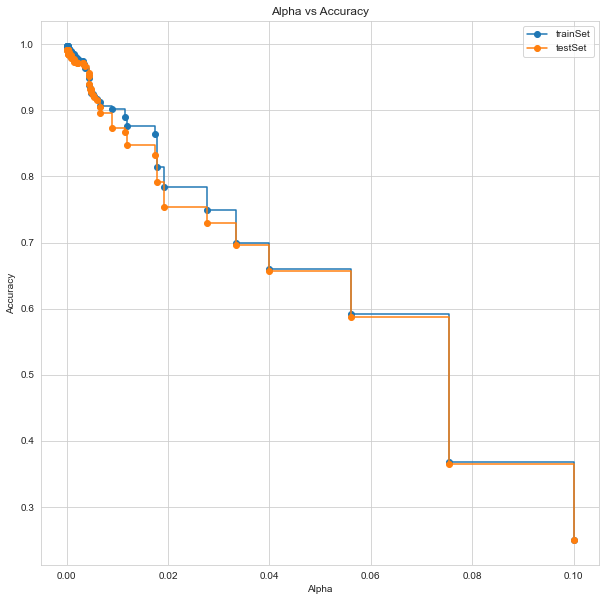

In [78]:
collections = []
for i in alpha_value:
    collection = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    collection.fit(X_train_new,y_train)
    collections.append(collection)
    


fig, ax = plt.subplots(figsize=(10,10));
train_acc,  test_acc = [], [] 
y_train_pred= [a.predict(X_train_new) for a in collections]
y_test_pred= [a.predict(X_test_new) for a in collections]
train_acc=[accuracy_score(i,y_train) for i in y_train_pred]
test_acc=[accuracy_score(i,y_test) for i in y_test_pred]

ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha vs Accuracy")
ax.plot(alpha_value, train_acc, marker='o', label="trainSet",
        drawstyle="steps-post")
ax.plot(alpha_value, test_acc, marker='o', label="testSet",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Trying different values of ccp_alpha

In [79]:
model = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.03)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]


print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)


print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))



max_depth  6
no. of nodes 15
15
15
no of leaves 8


25-fold accuracy scores:
 [0.74285714 0.7        0.77142857 0.71428571 0.8        0.75
 0.74285714 0.76428571 0.76428571 0.72661871 0.70503597 0.76258993
 0.76258993 0.8057554  0.76258993 0.72661871 0.72661871 0.77697842
 0.75539568 0.75539568 0.76978417 0.69064748 0.74100719 0.72661871
 0.76978417]
Mean cv-accuracy:
 0.7485611510791367
Standard Deviation of cv-accuracy:
 0.028395991434112484


# Depth 11 with ccp_alpha=0.0025

In [80]:
model = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.0025)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]


print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)


print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))



max_depth  11
no. of nodes 83
83
83
no of leaves 42


25-fold accuracy scores:
 [0.95       0.97857143 1.         0.92857143 0.98571429 0.96428571
 0.96428571 0.96428571 0.97142857 0.98561151 0.99280576 0.99280576
 0.99280576 0.98561151 0.98561151 1.         0.99280576 0.95683453
 0.97122302 0.97841727 0.94964029 0.98561151 0.96402878 0.95683453
 0.97841727]
Mean cv-accuracy:
 0.975048304213772
Standard Deviation of cv-accuracy:
 0.017544134387813805


In [81]:
model = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.001)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]


print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)


print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))



max_depth  12
no. of nodes 105
105
105
no of leaves 53


25-fold accuracy scores:
 [0.97142857 0.97857143 1.         0.97857143 0.99285714 0.98571429
 0.99285714 0.98571429 0.99285714 0.98561151 0.99280576 0.99280576
 0.99280576 0.98561151 0.98561151 1.         1.         0.97841727
 0.98561151 0.98561151 0.97841727 0.98561151 0.97122302 0.97122302
 0.97841727]
Mean cv-accuracy:
 0.9859342240493321
Standard Deviation of cv-accuracy:
 0.008487360971907835


In [82]:
model = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.006)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]


print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)


print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))



max_depth  10
no. of nodes 45
45
45
no of leaves 23


25-fold accuracy scores:
 [0.9        0.90714286 0.92857143 0.85714286 0.92857143 0.90714286
 0.9        0.9        0.95       0.90647482 0.90647482 0.94244604
 0.94244604 0.9352518  0.92086331 0.92086331 0.9352518  0.90647482
 0.94964029 0.9352518  0.92805755 0.89928058 0.89208633 0.89208633
 0.89928058]
Mean cv-accuracy:
 0.9156320657759507
Standard Deviation of cv-accuracy:
 0.021603508818845495


In [83]:
model = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.007)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]


print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)


print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))



max_depth  10
no. of nodes 37
37
37
no of leaves 19


25-fold accuracy scores:
 [0.89285714 0.89285714 0.9        0.85       0.92857143 0.90714286
 0.89285714 0.9        0.92142857 0.89208633 0.88489209 0.91366906
 0.92805755 0.9352518  0.89928058 0.92086331 0.91366906 0.90647482
 0.94244604 0.92086331 0.92086331 0.89208633 0.88489209 0.88489209
 0.89208633]
Mean cv-accuracy:
 0.9047235354573485
Standard Deviation of cv-accuracy:
 0.019847383277498076


# depth (8) without ccp_alpha value  

In [84]:
model = DecisionTreeClassifier(max_depth =8, random_state = 42)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
print(pd.DataFrame(score)[["test_score", "train_score"]])


print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)

y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Error rate", 1 - np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))

   test_score  train_score
0    0.936872     0.952996
1    0.959828     0.950126
2    0.939742     0.947973
3    0.956958     0.945102
4    0.936782     0.954448


max_depth  8
no. of nodes 97
97
97
no of leaves 49
Train score 0.9520665901262916
Test score 0.9462809917355371


25-fold accuracy scores:
 [0.94285714 0.94285714 0.95714286 0.90714286 0.97142857 0.95
 0.95       0.97142857 0.95       0.96402878 0.91366906 0.97841727
 0.9352518  0.95683453 0.95683453 0.97841727 0.95683453 0.94244604
 0.97122302 0.94964029 0.9352518  0.92086331 0.92805755 0.94964029
 0.92805755]
Mean cv-accuracy:
 0.9483329907502569
Error rate 0.0516670092497431
Standard Deviation of cv-accuracy:
 0.018831137456061697


In [85]:
model = tree.DecisionTreeClassifier(random_state = 42, ccp_alpha=0.02)
mymodel = model.fit(X_train_new,y_train)
score = cross_validate(mymodel,X_train_new,y_train, return_train_score = True)
print(pd.DataFrame(score)[["test_score", "train_score"]])

print('\n')

leaf_node = model.tree_.max_depth
print("max_depth ",leaf_node)

n_nodes = model.tree_.node_count
print("no. of nodes",n_nodes)

children_left = model.tree_.children_left
print(len(children_left))

children_right = model.tree_.children_right
print(len( children_right))

leaf_node = model.tree_.n_leaves
print("no of leaves",leaf_node)

model.fit(X_train_new,y_train)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


print('\n')
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(mymodel,X_train_new,y_train,cv=25) #Using 25 folds 
print("25-fold accuracy scores:\n", cross_val_scores)
print("Mean cv-accuracy:\n", np.mean(cross_val_scores))
print("Error rate", 1 - np.mean(cross_val_scores))
print("Standard Deviation of cv-accuracy:\n", np.std(cross_val_scores))

   test_score  train_score
0    0.773314     0.785791
1    0.786227     0.782562
2    0.824964     0.812343
3    0.787661     0.782203
4    0.788793     0.821377


max_depth  8
no. of nodes 19
19
19
no of leaves 10
Train score 0.7832950631458094
Test score 0.7541322314049587


25-fold accuracy scores:
 [0.75       0.76428571 0.78571429 0.75       0.82142857 0.77857143
 0.79285714 0.77857143 0.8        0.76978417 0.76258993 0.78417266
 0.82014388 0.83453237 0.8057554  0.79136691 0.76978417 0.8057554
 0.79856115 0.76978417 0.8057554  0.72661871 0.76978417 0.76978417
 0.77697842]
Mean cv-accuracy:
 0.7833031860226104
Error rate 0.2166968139773896
Standard Deviation of cv-accuracy:
 0.024366054727227547


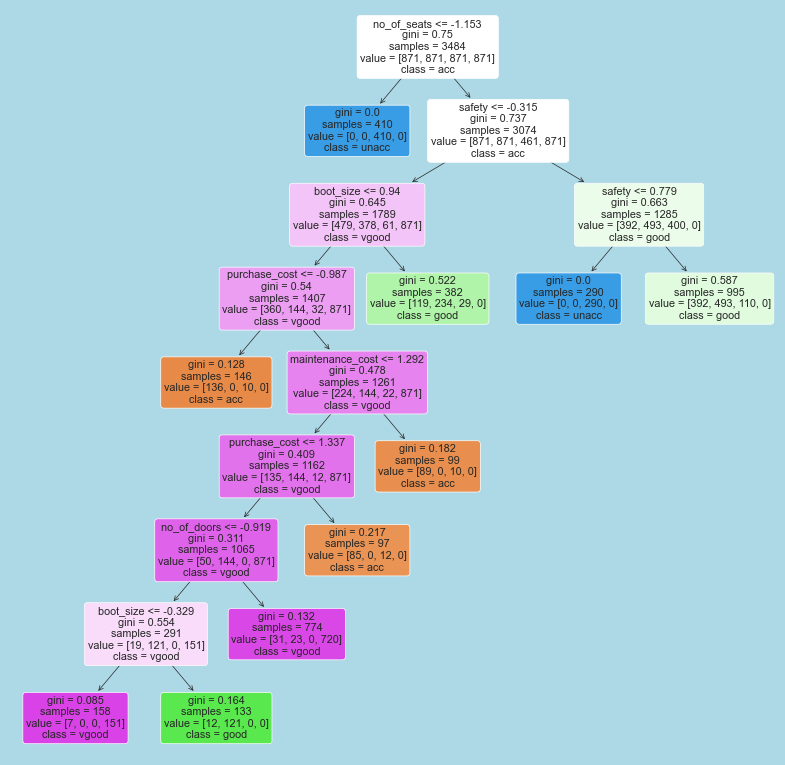

In [86]:
plt.figure(figsize=(20,20),facecolor = 'lightblue', dpi = 50,frameon = True, edgecolor = 'black')
tree.plot_tree(model,feature_names=cars_df.columns,class_names=['acc','good','unacc','vgood'],filled=True,rounded = True)
plt.show()